# Exploratory Data Analysis 

### Questions

1. What is the distribution of ages within the dataset? Is there an age range that is more prevalent?
2. What is the distribution of genders?
3. Corrupted data/missing values

In [1]:
import os
import scipy.io as sio
from pprint import pprint


imdb_path = "../dataset/imdb_crop"
wiki_path = "../dataset/wiki_crop"

for folder_name in os.listdir(imdb_path):
    folder_path = os.path.join(imdb_path, folder_name)
    
    if os.path.isdir(folder_path):
        # Looping through each image in the current folder
        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            # todo process image?
        
    else: # This is the .mat file
        imdb_mat = sio.loadmat(folder_path)
        
        imdb_dict = {}
        
    
        num_images = len(imdb_mat["imdb"][0][0][0][0])
        imdb_mat_content = imdb_mat["imdb"][0][0]
        
        for i in range(num_images):
            dob = imdb_mat_content[0][0][i]  # date of birth (Matlab serial date number)
            photo_taken = imdb_mat_content[1][0][i]  # year when the photo was taken
            full_path = imdb_mat_content[2][0][i]  # path to file
            gender = imdb_mat_content[3][0][i]  # 0 for female and 1 for male, NaN if unknown
            name = imdb_mat_content[4][0][i]  # name of the celebrity
            face_location = imdb_mat_content[5][0][i]  # location of the face
            face_score = imdb_mat_content[6][0][i]  # detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
            second_face_score = imdb_mat_content[7][0][i]  # detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
            
            imdb_dict[str(full_path)] = {
                "dob": int(dob) / 365
            }
        print(imdb_dict)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Loading Dataset

In [96]:
import os
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [82]:
imdb_mat_path = "../dataset/imdb_crop/imdb.mat"
imdb_mat = sio.loadmat(imdb_mat_path)
    
num_images = len(imdb_mat["imdb"][0][0][0][0])
imdb_mat_content = imdb_mat["imdb"][0][0]

dob = imdb_mat_content[0][0]  # date of birth (Matlab serial date number)
photo_taken = imdb_mat_content[1][0]  # year when the photo was taken
full_path = imdb_mat_content[2][0]  # path to file
gender = imdb_mat_content[3][0]  # 0 for female and 1 for male, NaN if unknown
name = imdb_mat_content[4][0]  # name of the celebrity
face_location = imdb_mat_content[5][0]  # location of the face
face_score = imdb_mat_content[6][0]  # detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
second_face_score = imdb_mat_content[7][0]  # detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
    
df = pd.DataFrame({
    'Year of Birth': dob, 
    'Photo Year': photo_taken, 
    'Image Path': full_path, 
    'Gender':gender, 
    'Name':name,
    'Face Score':face_score, 
    'Second Face Score': second_face_score
    })

# converting numpy lists to the first entry
df['Name'] = df['Name'].apply(lambda x: x[0])
df['Image Path'] = df['Image Path'].apply(lambda x: x[0])

df["Year of Birth"] = df["Year of Birth"] // 365
df["Age"] = df["Photo Year"] - df["Year of Birth"]
df

,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
0,1900,1968,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,1.459693,1.118973,68
1,1900,1970,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,2.543198,1.852008,70
2,1900,1968,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,3.455579,2.985660,68
3,1900,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1.872117,NaN,68
4,1900,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1.158766,NaN,68
...,...,...,...,...,...,...,...,...
460718,1991,2011,08/nm3994408_rm761245696_1989-12-29_2011.jpg,0.0,Jane Levy,3.845884,NaN,20
460719,1991,2011,08/nm3994408_rm784182528_1989-12-29_2011.jpg,0.0,Jane Levy,-inf,NaN,20
460720,1991,2011,08/nm3994408_rm926592512_1989-12-29_2011.jpg,0.0,Jane Levy,-inf,NaN,20
460721,1991,2011,08/nm3994408_rm943369728_1989-12-29_2011.jpg,0.0,Jane Levy,4.450725,NaN,20


### Data Quality

In [83]:
#  Dropping duplicate entries
df = df.drop_duplicates()

#  Removing genders with the value NaN, meaning that gender is unknown
df = df[(df["Gender"] == 1) | 
        (df["Gender"] == 0)]

#  Removing face scores with the value -inf, meaning that there was no face detected
df = df[df['Face Score'] != -np.inf]

#  Removing entries with invalid ages
df = df[(df["Age"] > 0) &
        (df["Age"] <= 100)]

#  Dropping entries with missing values
df.dropna()

#  Removing entries where birthday is unknown (birth year == 0)
df = df[df["Year of Birth"] != 0]

#  Removing entries with second face score, meaning multiple people in one image
df = df[pd.isna(df['Second Face Score'])]
df

,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
3,1900,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1.872117,NaN,68
4,1900,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1.158766,NaN,68
6,1925,2004,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0,Lauren Bacall,3.479189,NaN,79
7,1925,2004,02/nm0000002_rm1363385088_1924-9-16_2004.jpg,0.0,Lauren Bacall,3.870171,NaN,79
12,1925,1974,02/nm0000002_rm221957120_1924-9-16_1974.jpg,0.0,Lauren Bacall,4.096431,NaN,49
...,...,...,...,...,...,...,...,...
460715,1991,2011,08/nm3994408_rm73386752_1989-12-29_2011.jpg,0.0,Jane Levy,4.801987,NaN,20
460716,1991,2011,08/nm3994408_rm744468480_1989-12-29_2011.jpg,0.0,Jane Levy,2.370091,NaN,20
460718,1991,2011,08/nm3994408_rm761245696_1989-12-29_2011.jpg,0.0,Jane Levy,3.845884,NaN,20
460721,1991,2011,08/nm3994408_rm943369728_1989-12-29_2011.jpg,0.0,Jane Levy,4.450725,NaN,20


### Visualizing Dataset

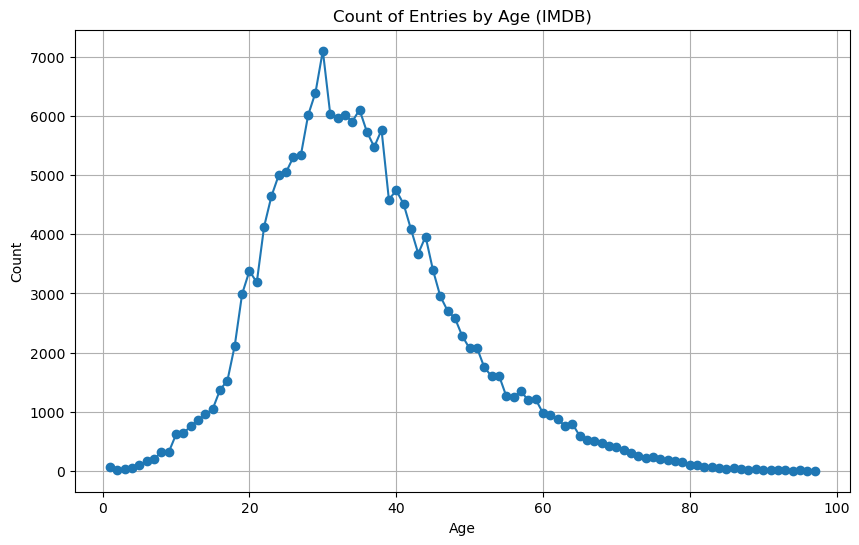

In [89]:
# Group by age and count the occurrences
age_counts = df['Age'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Count of Entries by Age (IMDB)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

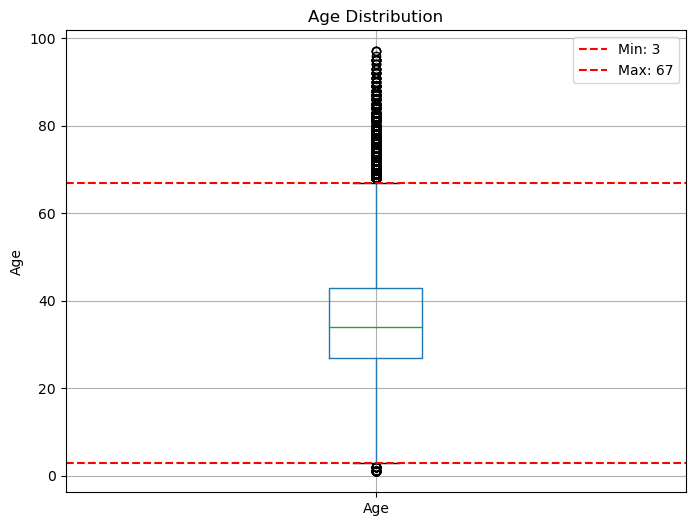

In [103]:
# Calculate min and max values excluding outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
min_value = df['Age'][df['Age'] >= lower_bound].min()
max_value = df['Age'][df['Age'] <= upper_bound].max()

# Create the boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='Age')

# Add dotted lines for min and max values
plt.axhline(y=min_value, color='red', linestyle='--', label=f'Min: {min_value}')
plt.axhline(y=max_value, color='red', linestyle='--', label=f'Max: {max_value}')

plt.title('Age Distribution')
plt.ylabel('Age')
plt.legend()
plt.show()

In [104]:
df.describe()

,Year of Birth,Photo Year,Gender,Face Score,Second Face Score,Age
count,181440.000000,181440.000000,181440.000000,181440.000000,0.0,181440.000000
mean,1970.198049,2005.831476,0.550502,3.092243,NaN,35.633427
std,14.942116,8.484734,0.497444,1.362119,NaN,13.010720
min,1884.000000,1961.000000,0.000000,0.730919,NaN,1.000000
25%,1963.000000,2004.000000,0.000000,1.958539,NaN,27.000000
50%,1972.000000,2008.000000,1.000000,3.063203,NaN,34.000000
75%,1981.000000,2011.000000,1.000000,4.172317,NaN,43.000000
max,2011.000000,2015.000000,1.000000,7.381689,NaN,97.000000


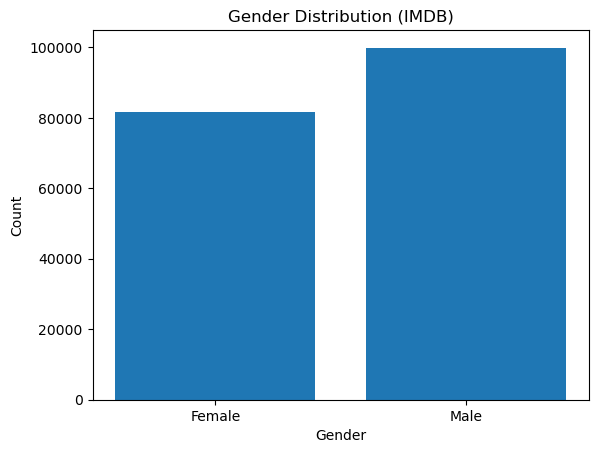

In [87]:
gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (IMDB)')

plt.xticks([0, 1], ['Female', 'Male'])

plt.show()